**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0

Link to dataset files<br>
http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import re
import seaborn as sns

In [2]:
#Loading data
books = pd.read_csv("books/books.csv",sep = ';', error_bad_lines=False, encoding="latin-1")
users = pd.read_csv('books/users.csv',sep = ';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('books/ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


### checking shapes of the datasets

In [3]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


### Exploring books dataset

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [6]:
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [7]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### check the unique values of yearOfPublication


In [10]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [12]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


#### Drop those rows

In [13]:
books = books[(books['Year-Of-Publication'] != 'DK Publishing Inc') & (books['Year-Of-Publication'] != 'Gallimard')]

### Change the datatype of yearOfPublication to 'int'

In [14]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int32')

In [15]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
dtype: object

### **Publisher**

In [18]:
#drop NaNs in 'publisher' column
books = books.dropna(subset=['Publisher'])
books.Publisher.isnull().sum()

0

### **Users**

In [19]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


**Age**

In [20]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replacing these by NaNs

In [21]:
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

### Replace null values with mean

In [22]:
#replacing NaNs with mean
users.Age = users.Age.fillna(users.Age.mean())

### Change the datatype to int

In [23]:
#setting the data type as int
users.Age = users.Age.astype(np.int32)

In [24]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


### **Ratings Dataset**

### check the shape

In [25]:
ratings.shape

(1149780, 3)

Ratings dataset will have n_users*n_books entries.

In [26]:
n_users = users.shape[0]
n_books = books.shape[0]
print(n_users * n_books)

75669512590


In [27]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Ratings dataset should have books only which exist in our books dataset.

In [28]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

In [29]:
print(ratings.shape)
print(ratings_new.shape)

(1149780, 3)
(1031130, 3)


It can be seen that many rows having book ISBN not part of books dataset got dropped off

Ratings dataset should have ratings from users which exist in users dataset.

In [30]:
ratings = ratings[ratings.userID.isin(users.userID)]

In [31]:
print(ratings.shape)
print(ratings_new.shape)

(1149780, 3)
(1031130, 3)


### Consider only ratings from 1-10 and leave 0s.

In [32]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [33]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new.bookRating != 0]
ratings_implicit = ratings_new[ratings_new.bookRating == 0]

In [34]:
#checking shapes
print(ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)

(1031130, 3)
(383839, 3)
(647291, 3)


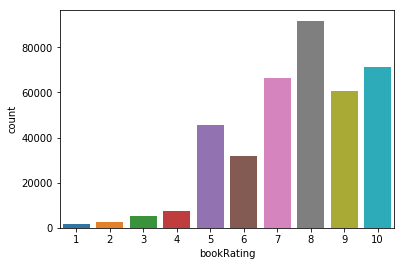

In [35]:
#plotting count of bookRating
sns.countplot(data=ratings_explicit , x='bookRating')
plt.show()
#It can be seen that higher ratings are more common amongst users and rating 8 has been rated highest number of times

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [36]:
counts1 = ratings_explicit['userID'].value_counts()
# print(counts1)
ratings_explicit = ratings_explicit[ratings_explicit['userID'].isin(counts1[counts1 >= 100].index)]

In [37]:
ratings_explicit.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9


In [38]:
ratings_explicit.shape

(103269, 3)

### Generating ratings matrix from explicit ratings table


In [39]:
ratings_matrix = ratings_explicit.pivot(index='userID', columns='ISBN', values='bookRating').fillna(0)
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(449, 66572)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### since NaNs cannot be handled by training algorithms, replacing these by 0, which indicates absence of ratings

In [40]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(ratings_matrix, k = 50)

In [41]:
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = ratings_matrix.columns)

In [42]:
preds_df.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
0,0.025341,-0.002146,-0.001431,-0.002146,-0.002146,0.002971,-0.003920,0.007035,0.007035,0.012316,...,0.000180,0.000226,0.042081,-0.016804,-0.080028,0.004746,0.028314,0.000120,-0.001693,0.067503
1,-0.010012,-0.003669,-0.002446,-0.003669,-0.003669,0.001075,0.001440,-0.003500,-0.003500,0.001612,...,-0.000363,0.000403,0.008142,0.001104,-0.029224,0.000999,0.002363,-0.000242,0.000029,-0.013059
2,-0.015054,-0.015457,-0.010304,-0.015457,-0.015457,0.007281,-0.014033,0.011941,0.011941,0.011796,...,-0.000455,0.001907,0.047982,0.005737,0.117859,0.006945,0.003119,-0.000304,0.009009,-0.057692
3,-0.021499,0.035602,0.023735,0.035602,0.035602,0.030307,0.024215,-0.001053,-0.001053,0.067579,...,0.002971,0.009912,0.086248,-0.008818,0.016154,0.028848,-0.000125,0.001981,0.031201,-0.046664
4,0.002077,-0.007965,-0.005310,-0.007965,-0.007965,0.002947,0.003057,0.000231,0.000231,0.006080,...,0.002120,0.001597,-0.012181,0.009420,0.673459,0.002591,-0.008229,0.001413,0.004918,0.047773


### Take a particular user_id

In [43]:
user_id = 2

In [44]:
userID = ratings_matrix.iloc[user_id-1, :].name
userID

2110

In [45]:
preds_df.shape

(449, 66572)

In [46]:
sorted_user_predictions = preds_df.iloc[user_id].sort_values(ascending=False)

In [47]:
len(sorted_user_predictions)

66572

In [48]:
# Get all user interacted books
user_data = ratings_explicit[ratings_explicit.userID == (userID)]

In [49]:
user_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [50]:
user_data.shape

(103, 3)

In [51]:
book_data = books[books.ISBN.isin(user_data.ISBN)]

In [52]:
book_data.shape

(103, 5)

In [53]:
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
246,0151008116,Life of Pi,Yann Martel,2002,Harcourt
904,015216250X,So You Want to Be a Wizard: The First Book in ...,Diane Duane,2001,Magic Carpet Books
1000,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy
1302,0345307674,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books
1472,0671527215,Hitchhikers's Guide to the Galaxy,Douglas Adams,1984,Pocket


In [54]:
user_full_info = user_data.merge(book_data)

In [55]:
user_full_info.head()

,userID,ISBN,bookRating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt


In [56]:
print ('User {0} has already rated {1} movies.'.format(userID, user_full_info.shape[0]))

User 2110 has already rated 103 movies.


In [57]:
recommendations = (books[~books['ISBN'].isin(user_full_info['ISBN'])].
                   merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left', left_on = 'ISBN'
                         ,right_on = 'ISBN')).rename(columns = {user_id: 'Predictions'})

In [58]:
recommendations.shape

(271252, 6)

In [59]:
recommendations.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Predictions
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0.004590
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,0.040935
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,NaN


### Get top 10 recommendations for above given userID

In [60]:
recommendations.sort_values('Predictions', ascending = False).iloc[:10, :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Predictions
407,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",1.015397
2116,0345350499,The Mists of Avalon,MARION ZIMMER BRADLEY,1987,Del Rey,0.697309
2438,0440214041,The Pelican Brief,John Grisham,1993,Dell,0.665439
455,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group,0.663549
521,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,0.642840
20670,0345318862,Golem in the Gears (Xanth Novels (Paperback)),PIERS ANTHONY,1986,Del Rey,0.639465
4810,0345313151,Bearing an Hourglass (Incarnations of Immortal...,Piers Anthony,1991,Del Rey Books,0.631446
6320,0380752891,"Man from Mundania (Xanth Trilogy, No 12)",Piers Anthony,1990,Harper Mass Market Paperbacks,0.629143
44448,051511605X,Undue Influence,Steven Paul Martini,1995,Jove Books,0.617955
8977,043936213X,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,2001,Scholastic,0.614288
